In [82]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
# input data

# file_path = 'D:/1. PhD research reference/OneDrive - Knights - University of Central Florida/RTOR/LSTM/Data_Trajectory1_20/' # campus computer
file_path = 'D:/OneDrive - Knights - University of Central Florida/RTOR/LSTM/Data_Trajectory1_20/' #  laptop: 
data = pd.read_csv(file_path + 'train.csv')
data.head()

,frameNum,carId,carCenterX,carCenterY,headX,headY,tailX,tailY,boundingBox1X,boundingBox1Y,...,boundingBox2Xft,boundingBox2Yft,boundingBox3Xft,boundingBox3Yft,boundingBox4Xft,boundingBox4Yft,speed,heading,course,laneId
0,2055,270,501,879,548,878,454,881,549,897,...,83.335814,164.840072,83.152658,157.880157,100.369288,157.330691,34.873556,179.806685,359.806685,7
1,2056,270,512,879,559,879,466,880,559,898,...,85.350526,164.656916,85.350526,157.697002,102.384000,157.513846,34.937969,179.937931,359.937931,7
2,2057,270,522,879,569,879,476,879,569,898,...,87.182082,164.473760,87.182082,157.697002,104.215556,157.697002,35.071956,180.136898,0.136898,7
3,2058,270,531,879,578,879,485,879,578,898,...,88.830483,164.473760,88.830483,157.697002,105.863957,157.697002,35.138985,180.204623,0.204623,7
4,2059,270,540,878,588,878,493,879,588,897,...,90.295728,164.473760,90.295728,157.513846,107.695514,157.330691,35.206014,180.204623,0.204623,7


In [84]:
# Extract trajectories from the desired columns
trajectories = data[['boundingBox1Xft', 'boundingBox1Yft']].values  # Replace 'Column23Name' and 'Column24Name' with actual column names


In [85]:
print(trajectories.shape)

(450, 2)


In [86]:
# Train the HMM
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
model.fit(trajectories)

# # Train the GMMHMM
# model = hmm.GMMHMM(n_components=3, n_mix=2, covariance_type="full", n_iter=1000)
# model.fit(trajectories)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

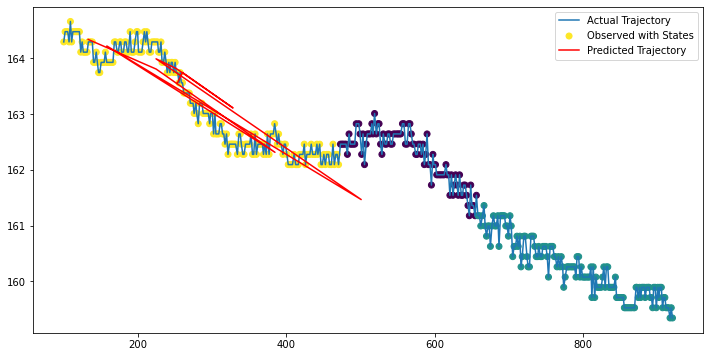

Time taken for model predictions: 0.01 seconds


In [87]:
import time

# Start timing
start_time = time.time()

# Predict the states for the observed data
predicted_states = model.predict(trajectories)

# Predict the next trajectory points (e.g., next 10 points)
future_observations = model.sample(10)[0]

# Stop timing for model predictions
model_time = time.time() - start_time

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(trajectories[:, 0], trajectories[:, 1], label="Actual Trajectory")
plt.scatter(trajectories[:, 0], trajectories[:, 1], c=predicted_states, cmap='viridis', label="Observed with States")
plt.plot(future_observations[:, 0], future_observations[:, 1], 'r', label="Predicted Trajectory")
plt.legend()
plt.show()


print(f"Time taken for model predictions: {model_time:.2f} seconds")



In [88]:
import numpy as np

# Define the RMSE function
def calculate_rmse(true_values, predicted_values):
    return np.sqrt(np.mean((true_values - predicted_values) ** 2))

# Assuming trajectories is your actual observed data
actual_observations = trajectories

# Predict the states for the observed data
predicted_states = model.predict(trajectories)

# Using the means of the Gaussian distributions for each state as predicted observations.
predicted_observations = np.array([model.means_[state] for state in predicted_states])

# Calculate RMSE
rmse = calculate_rmse(actual_observations, predicted_observations)
print("RMSE:", rmse)


RMSE: 62.19139281536616
